In [2]:
with open("input.txt", encoding='utf-8') as f:
    text = f.read()

vocab_size = len(set(text))

In [6]:
encoder_map = {c: i for i, c in enumerate(set(text))}
decoder_map = {i: c for i, c in enumerate(set(text))}

encode = lambda x: [encoder_map[c] for c in x]
decode = lambda x: ''.join([decoder_map[i] for i in x])

In [9]:
encode("Test string"), decode(encode("Test string"))

([36, 34, 55, 62, 3, 55, 62, 2, 7, 47, 43], 'Test string')

In [18]:
import torch

data = torch.tensor(encode(text), dtype=torch.long)
data[:25]

tensor([41,  7,  2, 55, 62,  3, 27,  7, 62,  7,  1, 34, 47, 38,  0, 51, 34, 18,
        31,  2, 34,  3, 48, 34,  3])

In [16]:
split = int(len(data) * 0.8)
train_data, val_data = data[:split], data[split:]

In [38]:
torch.manual_seed(2115)
batch_size = 4
seq_len = 8


def get_batches(mode):
    bath_data = train_data if mode == 'train' else val_data
    idx = torch.randint(0, len(bath_data) - seq_len, (batch_size,))
    x = torch.stack([bath_data[i:i + seq_len] for i in idx])
    y = torch.stack([bath_data[i + 1:i + seq_len + 1] for i in idx])
    return x, y


xb, yb = get_batches('train')

In [103]:
import torch.nn as nn
from torch.nn import functional as F


class BigramLanguageModel(nn.Module):

    def __init__(self, vocab_size):
        super().__init__()
        self.token_embedding = nn.Embedding(vocab_size, vocab_size)

    def forward(self, idx, targets=None):
        x = self.token_embedding(idx)
        B, T, C = x.shape
        x = x.view(B * T, C)
        if targets is not None:
            targets = targets.view(B * T)
            loss = F.cross_entropy(x, targets)
            return x, loss
        return x, None

    def generate(self, idx, n):
        for _ in range(n):
            logits, _ = self(idx)
            p = F.softmax(logits, dim=-1)
            next_token = torch.multinomial(p, num_samples=1)[-1, :].unsqueeze(0)
            idx = torch.cat((idx, next_token), dim=1)
        return idx


m = BigramLanguageModel(vocab_size)
x, loss = m(xb)
print(x.shape)
idx = torch.zeros((1, 1), dtype=torch.long)
decode(m.generate(idx, 10)[0].tolist())

torch.Size([32, 65])


'\njJ-oTZTKGa'

In [112]:
optimizer = torch.optim.Adam(m.parameters(), lr=0.001)

batch_size = 32
history = []
for _ in range(10000):
    x, y = get_batches('train')
    logits, loss = m(x, y)
    optimizer.zero_grad(set_to_none=True)
    loss.backward()
    optimizer.step()
    history.append(loss.item())

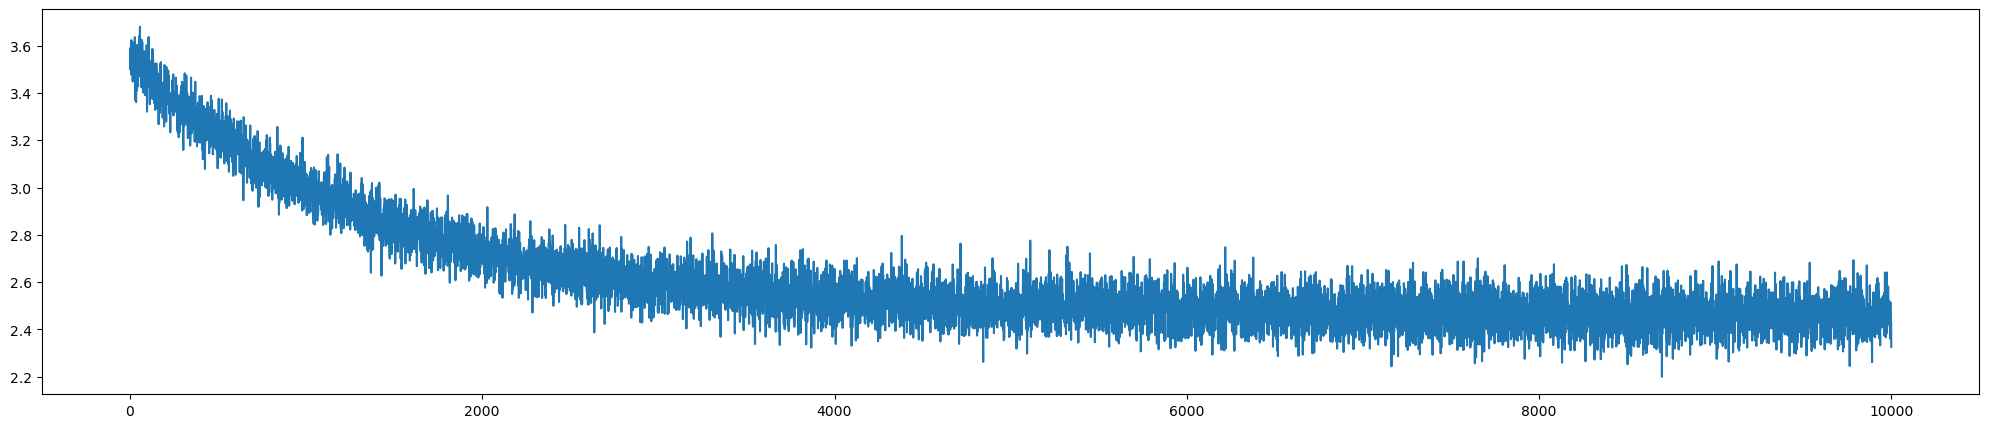

In [115]:
import matplotlib.pyplot as plt
plt.figure(figsize=(25, 5))
plt.plot(history)

In [119]:
print(decode(m.generate(idx, 300)[0].tolist()))


th ntoure.
NTut's the o s o m oton bukowhetitinseme tsp.
Wenoupofete ard wa aroobaile n CHelallethen shese verave LAuthagoleen.

AROf-cor w;
NGHeaty.

Y e bomouby hile s n'llel, thio f t?
Woce ft er se ou ghil o so y se
h blf woodaice al thin d tld t o se? torie, thens t,

An, priand.
Co aghil,
QUST
